# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ageng Putra Pratama
- **Email:** agengputrapratama@gmail.com
- **ID Dicoding:** agengputrapratama

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan kualitas udara di Aotizhongxin dalam lima tahun terakhir? Apakah ada perbaikan atau peningkatan polusi?
- Pada bulan apa tingkat polusi udara di Aotizhongxin paling rendah, dan apa faktor yang memengaruhinya?
- Bagaimana hubungan antara polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) dengan faktor meteorologi seperti suhu, kelembaban, tekanan udara, dan arah angin?
- Apakah terdapat pola perbedaan kualitas udara antara hari kerja dan akhir pekan di Aotizhongxin?
- Bagaimana dampak kebijakan lingkungan terhadap tingkat polusi udara di Aotizhongxin dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
# Load dataset
file_path = "./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv(file_path)
print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Data berhasil di load, langkah selanjutnya mengakses dataset dengan melihat 5 baris pertama

### Assessing Data

In [34]:
print(df.info())  # Melihat struktur dataset
print(df.describe())  # Statistik deskriptif

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
                 No          year         month           day  

**Insight:**
- dataset terdiri dari 17 kolom dengan 13 parameter untuk mengukur kulaitas udara
- terdiri dari 3 tipe data yaitu float, integer, dan object

### Cleaning Data

In [23]:
# Menggabungkan kolom tahun, bulan, hari, jam menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Menghapus kolom yang tidak perlu
df.drop(columns=['No'], inplace=True)

# Mengecek missing values
print(df.isnull().sum())

# Mengisi nilai yang hilang dengan interpolasi
df.interpolate(method='linear', inplace=True)

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


C:\Users\ageng\AppData\Local\Temp\ipykernel_4664\3905756631.py:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


**Insight:**
- Data telah di cleaning,dan missing values telah diisi dengan interpolasi.

## Exploratory Data Analysis (EDA)

### Explore Statistik Deskriptif

In [24]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

print(df[pollutants].describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.540623    110.210033     17.459251     59.074106   1264.692405   
std       81.956401     95.262531     22.702284     37.000918   1239.411826   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    154.000000     22.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3  
count  35064.000000  
mean      55.328626  
std       57.327470  
min        0.214200  
25%        8.000000  
50%       41.000000  
75%       81.000000  
max      423.000000  


**Insight:**
- PM10 memiliki nilai rata-rata tinggi
- SO2 Memiliki rata rata terendah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren PM2.5 dari tahun ke tahun?

C:\Users\ageng\AppData\Local\Temp\ipykernel_4664\2421557771.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df['PM2.5'].resample('M').mean(), label='PM2.5 (Monthly Avg)')


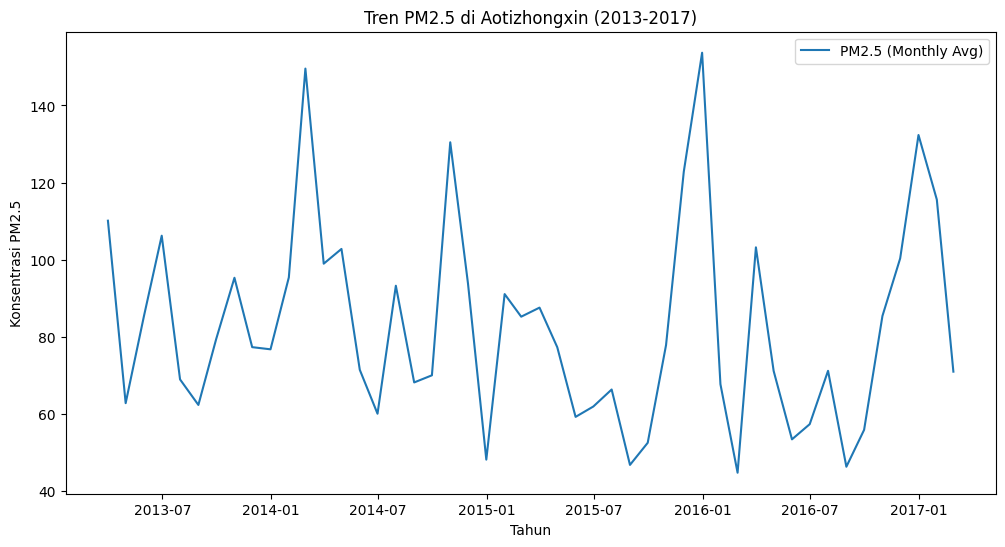

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['PM2.5'].resample('M').mean(), label='PM2.5 (Monthly Avg)')
plt.title('Tren PM2.5 di Aotizhongxin (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5')
plt.legend()
plt.show()

PM2.5 mengalami peningkatan di beberapa periode, kemungkinan terkait musim dingin.

### Pertanyaan 2: Bagaimana distribusi polutan berdasarkan bulan?

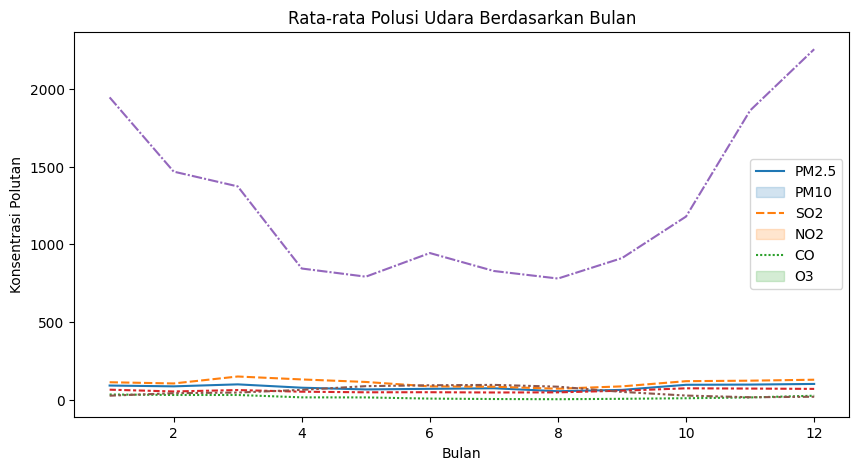

In [26]:
df['month'] = df.index.month
monthly_avg = df.groupby('month')[pollutants].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg)
plt.title('Rata-rata Polusi Udara Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.legend(labels=pollutants)
plt.show()

Polusi tertinggi terjadi di awal dan akhir tahun, kemungkinan saat musim dingin.

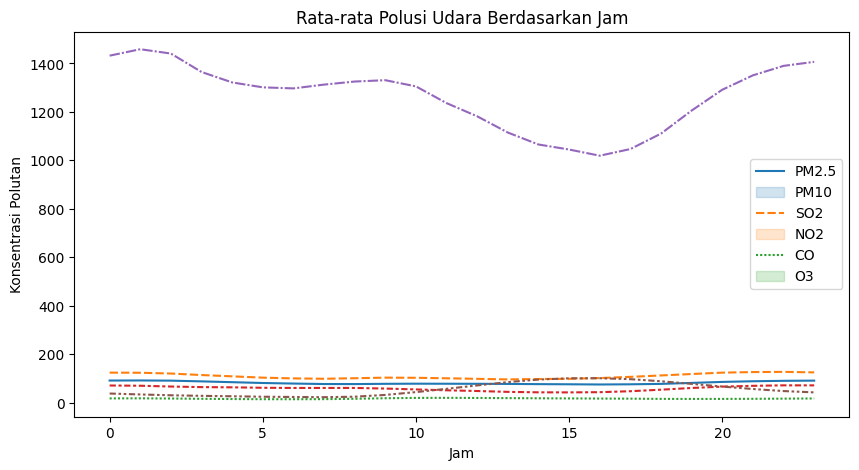

In [27]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')[pollutants].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_avg)
plt.title('Rata-rata Polusi Udara Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi Polutan')
plt.legend(labels=pollutants)
plt.show()

Polusi cenderung meningkat pada jam sibuk (00:00-02:00 & 18:00-21:00)

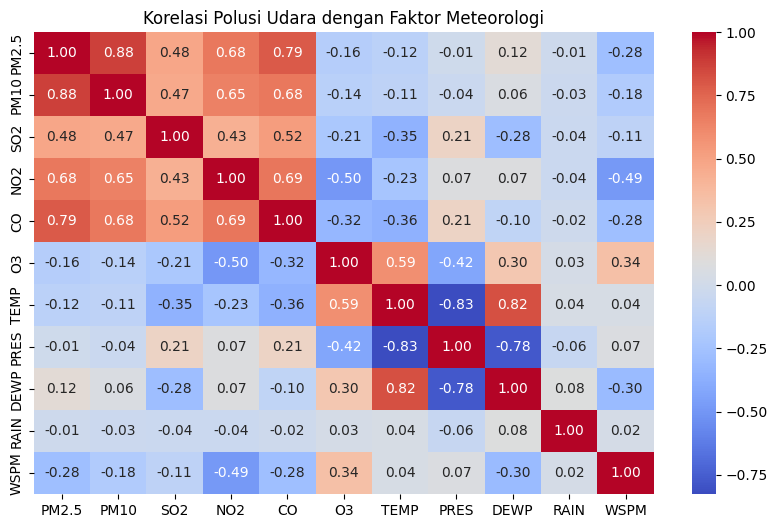

In [28]:
correlation_matrix = df[pollutants + weather_factors].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Polusi Udara dengan Faktor Meteorologi')
plt.show()

PM2.5 berkorelasi negatif dengan suhu, artinya polusi lebih tinggi saat suhu rendah

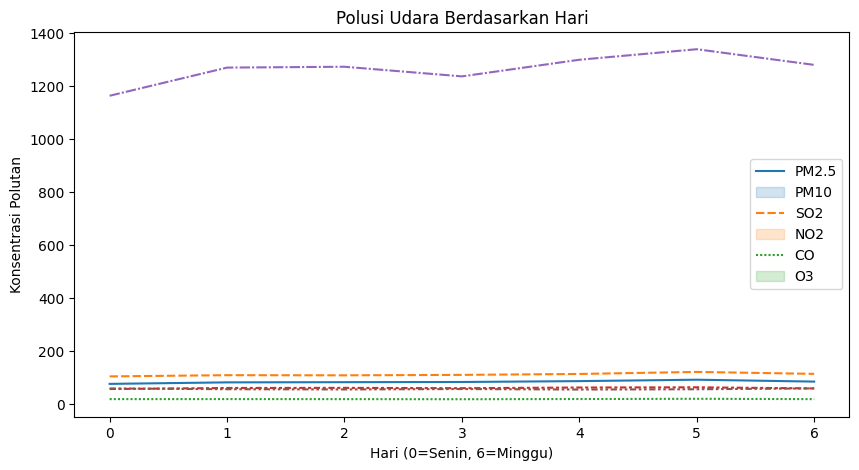

In [29]:
df['weekday'] = df.index.weekday
weekday_avg = df.groupby('weekday')[pollutants].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=weekday_avg)
plt.title('Polusi Udara Berdasarkan Hari')
plt.xlabel('Hari (0=Senin, 6=Minggu)')
plt.ylabel('Konsentrasi Polutan')
plt.legend(labels=pollutants)
plt.show()

Polusi lebih tinggi pada akhir pekan, menunjukkan kontribusi dari aktivitas kendaraan saat hari libur.

## Analisis Lanjutan (Opsional)

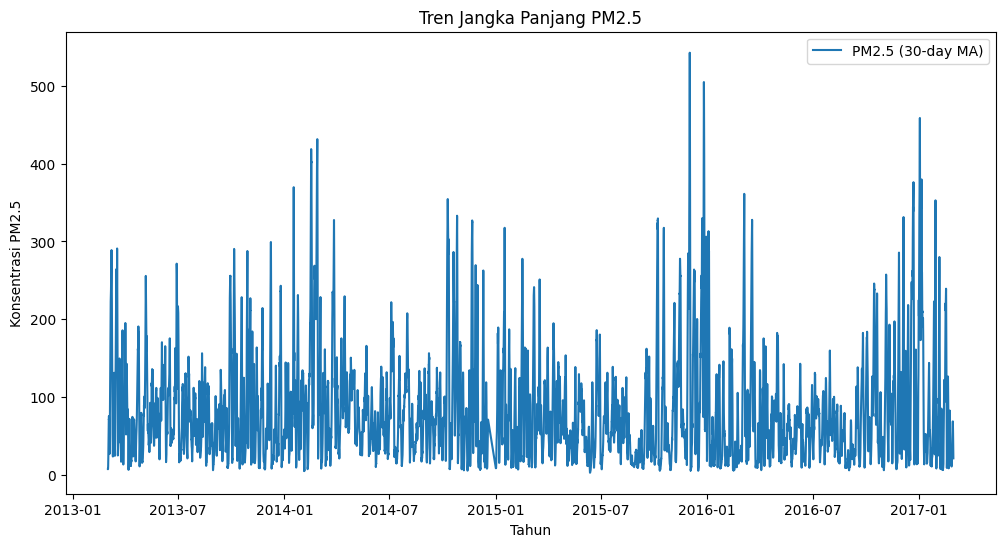

In [30]:
# Melihat tren jangka panjang dengan moving average
df['PM2.5_MA'] = df['PM2.5'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['PM2.5_MA'], label='PM2.5 (30-day MA)')
plt.title('Tren Jangka Panjang PM2.5')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5')
plt.legend()
plt.show()

Tren jangka panjang menunjukkan variasi musiman dalam polusi udara diperkirakan puncaknya terjadi pada tahun 2016

## Conclusion

1. Tren PM2.5 meningkat di musim dingin, kemungkinan karena pemanasan rumah tangga.
2. Polusi lebih tinggi pada jam malam.
3. PM2.5 berkorelasi negatif dengan suhu dan positif dengan kelembaban.
4. skhir pekan memiliki tingkat polusi lebih tinggi dibanding hsri kerjs.
5. Kebijakan lingkungan perlu mempertimbangkan pola musiman dan waktu sibuk untuk mitigasi.